# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (optimize for number of positions)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
pos = range(1, 10)
pos = [str(p) for p in pos]

Run Strategy

In [6]:
strategies = pd.Series()
for p in pos:
    print("{0}".format(p), end=" ")
    strategies[p] = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=int(p))
    strategies[p].run()
    _, strategies[p].tlog, strategies[p].dbal = strategies[p].get_logs()
    strategies[p].stats = strategies[p].stats()

1 2000-01-03 00:00:00 BUY  68 SPY @ 145.44
2000-01-14 00:00:00 SELL 68 SPY @ 146.97
2000-01-24 00:00:00 BUY  71 SPY @ 140.34
2000-02-03 00:00:00 SELL 71 SPY @ 143.19
2000-02-11 00:00:00 BUY  74 SPY @ 138.69
2000-02-29 00:00:00 SELL 74 SPY @ 137.44
2000-03-08 00:00:00 BUY  74 SPY @ 136.88
2000-03-16 00:00:00 SELL 74 SPY @ 146.34
2000-03-30 00:00:00 BUY  73 SPY @ 148.69
2000-04-07 00:00:00 SELL 73 SPY @ 151.44
2000-04-12 00:00:00 BUY  75 SPY @ 146.28
2000-04-25 00:00:00 SELL 75 SPY @ 148.16
2000-05-03 00:00:00 BUY  79 SPY @ 140.75
2000-05-15 00:00:00 SELL 79 SPY @ 145.28
2000-05-19 00:00:00 BUY  82 SPY @ 141.12
2000-05-30 00:00:00 SELL 82 SPY @ 142.50
2000-06-12 00:00:00 BUY  80 SPY @ 144.88
2000-06-13 00:00:00 SELL 80 SPY @ 147.59
2000-06-22 00:00:00 BUY  82 SPY @ 145.62
2000-07-03 00:00:00 SELL 82 SPY @ 147.28
2000-07-21 00:00:00 BUY  81 SPY @ 147.69
2000-08-04 00:00:00 SELL 81 SPY @ 146.38
2000-09-06 00:00:00 BUY  80 SPY @ 149.56
2000-10-19 00:00:00 SELL 80 SPY @ 139.31
2002-03-14 00:

2 2000-01-03 00:00:00 BUY  34 SPY @ 145.44
2000-01-04 00:00:00 BUY  36 SPY @ 139.75
2000-01-14 00:00:00 SELL 70 SPY @ 146.97
2000-01-24 00:00:00 BUY  36 SPY @ 140.34
2000-01-27 00:00:00 BUY  37 SPY @ 140.25
2000-02-03 00:00:00 SELL 73 SPY @ 143.19
2000-02-11 00:00:00 BUY  37 SPY @ 138.69
2000-02-17 00:00:00 BUY  38 SPY @ 138.28
2000-02-29 00:00:00 SELL 75 SPY @ 137.44
2000-03-08 00:00:00 BUY  38 SPY @ 136.88
2000-03-16 00:00:00 SELL 38 SPY @ 146.34
2000-03-30 00:00:00 BUY  36 SPY @ 148.69
2000-04-07 00:00:00 SELL 36 SPY @ 151.44
2000-04-12 00:00:00 BUY  37 SPY @ 146.28
2000-04-13 00:00:00 BUY  38 SPY @ 144.25
2000-04-25 00:00:00 SELL 75 SPY @ 148.16
2000-05-03 00:00:00 BUY  39 SPY @ 140.75
2000-05-15 00:00:00 SELL 39 SPY @ 145.28
2000-05-19 00:00:00 BUY  40 SPY @ 141.12
2000-05-22 00:00:00 BUY  40 SPY @ 140.06
2000-05-30 00:00:00 SELL 80 SPY @ 142.50
2000-06-12 00:00:00 BUY  39 SPY @ 144.88
2000-06-13 00:00:00 SELL 39 SPY @ 147.59
2000-06-22 00:00:00 BUY  39 SPY @ 145.62
2000-06-23 00:

2015-05-26 00:00:00 BUY  51 SPY @ 210.70
2015-06-04 00:00:00 BUY  52 SPY @ 210.13
2015-06-18 00:00:00 SELL 103 SPY @ 212.78
2015-06-25 00:00:00 BUY  52 SPY @ 209.86
2015-06-26 00:00:00 BUY  53 SPY @ 209.82
2015-07-13 00:00:00 SELL 105 SPY @ 209.77
2015-07-23 00:00:00 BUY  52 SPY @ 210.18
2015-07-24 00:00:00 BUY  53 SPY @ 208.00
2015-08-10 00:00:00 SELL 105 SPY @ 210.57
2015-08-19 00:00:00 BUY  53 SPY @ 208.32
2015-09-15 00:00:00 SELL 53 SPY @ 198.46
2015-11-11 00:00:00 BUY  52 SPY @ 207.74
2015-11-18 00:00:00 SELL 52 SPY @ 208.73
2015-12-02 00:00:00 BUY  52 SPY @ 208.53
2015-12-16 00:00:00 SELL 52 SPY @ 208.03
2016-03-24 00:00:00 BUY  53 SPY @ 203.12
2016-03-29 00:00:00 SELL 53 SPY @ 205.12
2016-04-07 00:00:00 BUY  53 SPY @ 203.95
2016-04-13 00:00:00 SELL 53 SPY @ 208.00
2016-04-28 00:00:00 BUY  53 SPY @ 207.45
2016-04-29 00:00:00 BUY  53 SPY @ 206.33
2016-05-10 00:00:00 SELL 106 SPY @ 208.45
2016-05-13 00:00:00 BUY  54 SPY @ 204.76
2016-05-19 00:00:00 BUY  54 SPY @ 204.20
2016-05-24 0

2013-12-05 00:00:00 BUY  35 SPY @ 178.94
2013-12-09 00:00:00 SELL 101 SPY @ 181.40
2013-12-11 00:00:00 BUY  34 SPY @ 178.72
2013-12-12 00:00:00 BUY  34 SPY @ 178.13
2013-12-13 00:00:00 BUY  34 SPY @ 178.11
2013-12-18 00:00:00 SELL 102 SPY @ 181.70
2014-01-03 00:00:00 BUY  34 SPY @ 182.89
2014-01-06 00:00:00 BUY  34 SPY @ 182.36
2014-01-10 00:00:00 SELL 68 SPY @ 184.14
2014-01-13 00:00:00 BUY  34 SPY @ 181.69
2014-01-15 00:00:00 SELL 34 SPY @ 184.66
2014-01-23 00:00:00 BUY  34 SPY @ 182.79
2014-01-24 00:00:00 BUY  35 SPY @ 178.89
2014-01-27 00:00:00 BUY  35 SPY @ 178.01
2014-02-07 00:00:00 SELL 104 SPY @ 179.68
2014-03-13 00:00:00 BUY  33 SPY @ 185.18
2014-03-14 00:00:00 BUY  34 SPY @ 184.66
2014-03-20 00:00:00 SELL 67 SPY @ 187.75
2014-03-26 00:00:00 BUY  34 SPY @ 184.97
2014-03-27 00:00:00 BUY  34 SPY @ 184.58
2014-03-31 00:00:00 SELL 68 SPY @ 187.01
2014-04-07 00:00:00 BUY  34 SPY @ 184.34
2014-04-10 00:00:00 BUY  35 SPY @ 183.16
2014-04-11 00:00:00 BUY  35 SPY @ 181.51
2014-04-21 00

4 2000-01-03 00:00:00 BUY  17 SPY @ 145.44
2000-01-04 00:00:00 BUY  17 SPY @ 139.75
2000-01-06 00:00:00 BUY  18 SPY @ 137.75
2000-01-14 00:00:00 SELL 52 SPY @ 146.97
2000-01-24 00:00:00 BUY  18 SPY @ 140.34
2000-01-27 00:00:00 BUY  18 SPY @ 140.25
2000-02-03 00:00:00 SELL 36 SPY @ 143.19
2000-02-11 00:00:00 BUY  18 SPY @ 138.69
2000-02-17 00:00:00 BUY  19 SPY @ 138.28
2000-02-29 00:00:00 SELL 37 SPY @ 137.44
2000-03-08 00:00:00 BUY  18 SPY @ 136.88
2000-03-16 00:00:00 SELL 18 SPY @ 146.34
2000-03-30 00:00:00 BUY  17 SPY @ 148.69
2000-04-07 00:00:00 SELL 17 SPY @ 151.44
2000-04-12 00:00:00 BUY  18 SPY @ 146.28
2000-04-13 00:00:00 BUY  18 SPY @ 144.25
2000-04-25 00:00:00 SELL 36 SPY @ 148.16
2000-05-03 00:00:00 BUY  19 SPY @ 140.75
2000-05-15 00:00:00 SELL 19 SPY @ 145.28
2000-05-19 00:00:00 BUY  19 SPY @ 141.12
2000-05-22 00:00:00 BUY  19 SPY @ 140.06
2000-05-30 00:00:00 SELL 38 SPY @ 142.50
2000-06-12 00:00:00 BUY  18 SPY @ 144.88
2000-06-13 00:00:00 SELL 18 SPY @ 147.59
2000-06-22 00:

2013-12-18 00:00:00 SELL 72 SPY @ 181.70
2014-01-03 00:00:00 BUY  23 SPY @ 182.89
2014-01-06 00:00:00 BUY  24 SPY @ 182.36
2014-01-10 00:00:00 SELL 47 SPY @ 184.14
2014-01-13 00:00:00 BUY  24 SPY @ 181.69
2014-01-15 00:00:00 SELL 24 SPY @ 184.66
2014-01-23 00:00:00 BUY  24 SPY @ 182.79
2014-01-24 00:00:00 BUY  24 SPY @ 178.89
2014-01-27 00:00:00 BUY  25 SPY @ 178.01
2014-01-29 00:00:00 BUY  25 SPY @ 177.35
2014-02-07 00:00:00 SELL 98 SPY @ 179.68
2014-03-13 00:00:00 BUY  23 SPY @ 185.18
2014-03-14 00:00:00 BUY  24 SPY @ 184.66
2014-03-20 00:00:00 SELL 47 SPY @ 187.75
2014-03-26 00:00:00 BUY  24 SPY @ 184.97
2014-03-27 00:00:00 BUY  24 SPY @ 184.58
2014-03-31 00:00:00 SELL 48 SPY @ 187.01
2014-04-07 00:00:00 BUY  24 SPY @ 184.34
2014-04-10 00:00:00 BUY  24 SPY @ 183.16
2014-04-11 00:00:00 BUY  25 SPY @ 181.51
2014-04-21 00:00:00 SELL 73 SPY @ 187.04
2014-05-06 00:00:00 BUY  24 SPY @ 186.78
2014-05-12 00:00:00 SELL 24 SPY @ 189.79
2014-05-15 00:00:00 BUY  24 SPY @ 187.40
2014-05-22 00:00

5 2000-01-03 00:00:00 BUY  13 SPY @ 145.44
2000-01-04 00:00:00 BUY  14 SPY @ 139.75
2000-01-06 00:00:00 BUY  14 SPY @ 137.75
2000-01-14 00:00:00 SELL 41 SPY @ 146.97
2000-01-24 00:00:00 BUY  14 SPY @ 140.34
2000-01-27 00:00:00 BUY  14 SPY @ 140.25
2000-02-03 00:00:00 SELL 28 SPY @ 143.19
2000-02-11 00:00:00 BUY  14 SPY @ 138.69
2000-02-17 00:00:00 BUY  15 SPY @ 138.28
2000-02-29 00:00:00 SELL 29 SPY @ 137.44
2000-03-08 00:00:00 BUY  15 SPY @ 136.88
2000-03-16 00:00:00 SELL 15 SPY @ 146.34
2000-03-30 00:00:00 BUY  14 SPY @ 148.69
2000-04-07 00:00:00 SELL 14 SPY @ 151.44
2000-04-12 00:00:00 BUY  14 SPY @ 146.28
2000-04-13 00:00:00 BUY  14 SPY @ 144.25
2000-04-25 00:00:00 SELL 28 SPY @ 148.16
2000-05-03 00:00:00 BUY  15 SPY @ 140.75
2000-05-15 00:00:00 SELL 15 SPY @ 145.28
2000-05-19 00:00:00 BUY  15 SPY @ 141.12
2000-05-22 00:00:00 BUY  15 SPY @ 140.06
2000-05-30 00:00:00 SELL 30 SPY @ 142.50
2000-06-12 00:00:00 BUY  14 SPY @ 144.88
2000-06-13 00:00:00 SELL 14 SPY @ 147.59
2000-06-22 00:

2012-10-17 00:00:00 SELL 59 SPY @ 146.20
2012-10-23 00:00:00 BUY  20 SPY @ 141.42
2012-10-24 00:00:00 BUY  20 SPY @ 141.02
2012-11-06 00:00:00 SELL 40 SPY @ 142.96
2012-11-07 00:00:00 BUY  20 SPY @ 139.72
2012-11-19 00:00:00 SELL 20 SPY @ 139.13
2012-12-26 00:00:00 BUY  20 SPY @ 141.75
2012-12-27 00:00:00 BUY  20 SPY @ 141.56
2012-12-28 00:00:00 BUY  21 SPY @ 140.03
2013-01-02 00:00:00 SELL 61 SPY @ 146.06
2013-02-04 00:00:00 BUY  19 SPY @ 149.54
2013-02-08 00:00:00 SELL 19 SPY @ 151.80
2013-02-20 00:00:00 BUY  19 SPY @ 151.34
2013-02-21 00:00:00 BUY  20 SPY @ 150.42
2013-02-25 00:00:00 BUY  20 SPY @ 149.00
2013-03-01 00:00:00 SELL 59 SPY @ 152.11
2013-03-18 00:00:00 BUY  19 SPY @ 154.97
2013-03-19 00:00:00 BUY  19 SPY @ 154.61
2013-03-21 00:00:00 BUY  19 SPY @ 154.36
2013-03-26 00:00:00 SELL 57 SPY @ 156.19
2013-04-05 00:00:00 BUY  19 SPY @ 155.16
2013-04-10 00:00:00 SELL 19 SPY @ 158.67
2013-04-15 00:00:00 BUY  19 SPY @ 155.12
2013-04-17 00:00:00 BUY  19 SPY @ 155.11
2013-04-18 00:00

6 2000-01-03 00:00:00 BUY  11 SPY @ 145.44
2000-01-04 00:00:00 BUY  12 SPY @ 139.75
2000-01-06 00:00:00 BUY  12 SPY @ 137.75
2000-01-14 00:00:00 SELL 35 SPY @ 146.97
2000-01-24 00:00:00 BUY  12 SPY @ 140.34
2000-01-27 00:00:00 BUY  12 SPY @ 140.25
2000-02-03 00:00:00 SELL 24 SPY @ 143.19
2000-02-11 00:00:00 BUY  12 SPY @ 138.69
2000-02-17 00:00:00 BUY  12 SPY @ 138.28
2000-02-29 00:00:00 SELL 24 SPY @ 137.44
2000-03-08 00:00:00 BUY  12 SPY @ 136.88
2000-03-16 00:00:00 SELL 12 SPY @ 146.34
2000-03-30 00:00:00 BUY  11 SPY @ 148.69
2000-04-07 00:00:00 SELL 11 SPY @ 151.44
2000-04-12 00:00:00 BUY  11 SPY @ 146.28
2000-04-13 00:00:00 BUY  12 SPY @ 144.25
2000-04-25 00:00:00 SELL 23 SPY @ 148.16
2000-05-03 00:00:00 BUY  12 SPY @ 140.75
2000-05-15 00:00:00 SELL 12 SPY @ 145.28
2000-05-19 00:00:00 BUY  12 SPY @ 141.12
2000-05-22 00:00:00 BUY  12 SPY @ 140.06
2000-05-30 00:00:00 SELL 24 SPY @ 142.50
2000-06-12 00:00:00 BUY  12 SPY @ 144.88
2000-06-13 00:00:00 SELL 12 SPY @ 147.59
2000-06-22 00:

2014-05-22 00:00:00 SELL 13 SPY @ 189.59
2014-07-17 00:00:00 BUY  13 SPY @ 195.71
2014-07-22 00:00:00 SELL 13 SPY @ 198.20
2014-07-29 00:00:00 BUY  13 SPY @ 196.95
2014-07-31 00:00:00 BUY  13 SPY @ 193.09
2014-08-01 00:00:00 BUY  13 SPY @ 192.50
2014-08-05 00:00:00 BUY  13 SPY @ 192.01
2014-08-07 00:00:00 BUY  14 SPY @ 191.03
2014-08-13 00:00:00 SELL 66 SPY @ 194.84
2014-09-09 00:00:00 BUY  13 SPY @ 199.32
2014-09-12 00:00:00 BUY  13 SPY @ 199.13
2014-09-15 00:00:00 BUY  13 SPY @ 198.98
2014-09-17 00:00:00 SELL 39 SPY @ 200.75
2014-09-23 00:00:00 BUY  13 SPY @ 198.01
2014-09-25 00:00:00 BUY  13 SPY @ 196.34
2014-10-01 00:00:00 BUY  13 SPY @ 194.35
2014-10-07 00:00:00 BUY  13 SPY @ 193.26
2014-10-09 00:00:00 BUY  14 SPY @ 192.74
2014-10-21 00:00:00 SELL 66 SPY @ 194.07
2014-12-10 00:00:00 BUY  12 SPY @ 203.16
2014-12-12 00:00:00 BUY  13 SPY @ 200.89
2014-12-15 00:00:00 BUY  13 SPY @ 199.51
2014-12-16 00:00:00 BUY  13 SPY @ 197.91
2014-12-18 00:00:00 SELL 51 SPY @ 206.78
2014-12-31 00:00

7 2000-01-03 00:00:00 BUY  9 SPY @ 145.44
2000-01-04 00:00:00 BUY  10 SPY @ 139.75
2000-01-06 00:00:00 BUY  10 SPY @ 137.75
2000-01-14 00:00:00 SELL 29 SPY @ 146.97
2000-01-24 00:00:00 BUY  10 SPY @ 140.34
2000-01-27 00:00:00 BUY  10 SPY @ 140.25
2000-02-03 00:00:00 SELL 20 SPY @ 143.19
2000-02-11 00:00:00 BUY  10 SPY @ 138.69
2000-02-17 00:00:00 BUY  10 SPY @ 138.28
2000-02-29 00:00:00 SELL 20 SPY @ 137.44
2000-03-08 00:00:00 BUY  10 SPY @ 136.88
2000-03-16 00:00:00 SELL 10 SPY @ 146.34
2000-03-30 00:00:00 BUY  9 SPY @ 148.69
2000-04-07 00:00:00 SELL 9 SPY @ 151.44
2000-04-12 00:00:00 BUY  10 SPY @ 146.28
2000-04-13 00:00:00 BUY  10 SPY @ 144.25
2000-04-25 00:00:00 SELL 20 SPY @ 148.16
2000-05-03 00:00:00 BUY  10 SPY @ 140.75
2000-05-15 00:00:00 SELL 10 SPY @ 145.28
2000-05-19 00:00:00 BUY  10 SPY @ 141.12
2000-05-22 00:00:00 BUY  10 SPY @ 140.06
2000-05-30 00:00:00 SELL 20 SPY @ 142.50
2000-06-12 00:00:00 BUY  10 SPY @ 144.88
2000-06-13 00:00:00 SELL 10 SPY @ 147.59
2000-06-22 00:00:

2012-12-27 00:00:00 BUY  13 SPY @ 141.56
2012-12-28 00:00:00 BUY  13 SPY @ 140.03
2013-01-02 00:00:00 SELL 39 SPY @ 146.06
2013-02-04 00:00:00 BUY  12 SPY @ 149.54
2013-02-08 00:00:00 SELL 12 SPY @ 151.80
2013-02-20 00:00:00 BUY  12 SPY @ 151.34
2013-02-21 00:00:00 BUY  12 SPY @ 150.42
2013-02-25 00:00:00 BUY  13 SPY @ 149.00
2013-03-01 00:00:00 SELL 37 SPY @ 152.11
2013-03-18 00:00:00 BUY  12 SPY @ 154.97
2013-03-19 00:00:00 BUY  12 SPY @ 154.61
2013-03-21 00:00:00 BUY  12 SPY @ 154.36
2013-03-26 00:00:00 SELL 36 SPY @ 156.19
2013-04-05 00:00:00 BUY  12 SPY @ 155.16
2013-04-10 00:00:00 SELL 12 SPY @ 158.67
2013-04-15 00:00:00 BUY  12 SPY @ 155.12
2013-04-17 00:00:00 BUY  12 SPY @ 155.11
2013-04-18 00:00:00 BUY  12 SPY @ 154.14
2013-04-23 00:00:00 SELL 36 SPY @ 157.78
2013-05-24 00:00:00 BUY  11 SPY @ 165.31
2013-05-29 00:00:00 BUY  11 SPY @ 165.22
2013-05-31 00:00:00 BUY  12 SPY @ 163.45
2013-06-05 00:00:00 BUY  12 SPY @ 161.27
2013-06-10 00:00:00 SELL 46 SPY @ 164.80
2013-06-20 00:00

8 2000-01-03 00:00:00 BUY  8 SPY @ 145.44
2000-01-04 00:00:00 BUY  9 SPY @ 139.75
2000-01-06 00:00:00 BUY  9 SPY @ 137.75
2000-01-14 00:00:00 SELL 26 SPY @ 146.97
2000-01-24 00:00:00 BUY  9 SPY @ 140.34
2000-01-27 00:00:00 BUY  9 SPY @ 140.25
2000-02-03 00:00:00 SELL 18 SPY @ 143.19
2000-02-11 00:00:00 BUY  9 SPY @ 138.69
2000-02-17 00:00:00 BUY  9 SPY @ 138.28
2000-02-29 00:00:00 SELL 18 SPY @ 137.44
2000-03-08 00:00:00 BUY  9 SPY @ 136.88
2000-03-16 00:00:00 SELL 9 SPY @ 146.34
2000-03-30 00:00:00 BUY  8 SPY @ 148.69
2000-04-07 00:00:00 SELL 8 SPY @ 151.44
2000-04-12 00:00:00 BUY  8 SPY @ 146.28
2000-04-13 00:00:00 BUY  9 SPY @ 144.25
2000-04-25 00:00:00 SELL 17 SPY @ 148.16
2000-05-03 00:00:00 BUY  9 SPY @ 140.75
2000-05-15 00:00:00 SELL 9 SPY @ 145.28
2000-05-19 00:00:00 BUY  9 SPY @ 141.12
2000-05-22 00:00:00 BUY  9 SPY @ 140.06
2000-05-30 00:00:00 SELL 18 SPY @ 142.50
2000-06-12 00:00:00 BUY  8 SPY @ 144.88
2000-06-13 00:00:00 SELL 8 SPY @ 147.59
2000-06-22 00:00:00 BUY  8 SPY @ 

2014-07-22 00:00:00 SELL 8 SPY @ 198.20
2014-07-29 00:00:00 BUY  8 SPY @ 196.95
2014-07-31 00:00:00 BUY  9 SPY @ 193.09
2014-08-01 00:00:00 BUY  9 SPY @ 192.50
2014-08-05 00:00:00 BUY  9 SPY @ 192.01
2014-08-07 00:00:00 BUY  9 SPY @ 191.03
2014-08-13 00:00:00 SELL 44 SPY @ 194.84
2014-09-09 00:00:00 BUY  8 SPY @ 199.32
2014-09-12 00:00:00 BUY  9 SPY @ 199.13
2014-09-15 00:00:00 BUY  9 SPY @ 198.98
2014-09-17 00:00:00 SELL 26 SPY @ 200.75
2014-09-23 00:00:00 BUY  8 SPY @ 198.01
2014-09-25 00:00:00 BUY  9 SPY @ 196.34
2014-10-01 00:00:00 BUY  9 SPY @ 194.35
2014-10-07 00:00:00 BUY  9 SPY @ 193.26
2014-10-09 00:00:00 BUY  9 SPY @ 192.74
2014-10-21 00:00:00 SELL 44 SPY @ 194.07
2014-12-10 00:00:00 BUY  8 SPY @ 203.16
2014-12-12 00:00:00 BUY  8 SPY @ 200.89
2014-12-15 00:00:00 BUY  9 SPY @ 199.51
2014-12-16 00:00:00 BUY  9 SPY @ 197.91
2014-12-18 00:00:00 SELL 34 SPY @ 206.78
2014-12-31 00:00:00 BUY  8 SPY @ 205.54
2015-01-02 00:00:00 BUY  8 SPY @ 205.43
2015-01-05 00:00:00 BUY  9 SPY @ 201

9 2000-01-03 00:00:00 BUY  7 SPY @ 145.44
2000-01-04 00:00:00 BUY  8 SPY @ 139.75
2000-01-06 00:00:00 BUY  8 SPY @ 137.75
2000-01-14 00:00:00 SELL 23 SPY @ 146.97
2000-01-24 00:00:00 BUY  8 SPY @ 140.34
2000-01-27 00:00:00 BUY  8 SPY @ 140.25
2000-02-03 00:00:00 SELL 16 SPY @ 143.19
2000-02-11 00:00:00 BUY  8 SPY @ 138.69
2000-02-17 00:00:00 BUY  8 SPY @ 138.28
2000-02-29 00:00:00 SELL 16 SPY @ 137.44
2000-03-08 00:00:00 BUY  8 SPY @ 136.88
2000-03-16 00:00:00 SELL 8 SPY @ 146.34
2000-03-30 00:00:00 BUY  7 SPY @ 148.69
2000-04-07 00:00:00 SELL 7 SPY @ 151.44
2000-04-12 00:00:00 BUY  7 SPY @ 146.28
2000-04-13 00:00:00 BUY  8 SPY @ 144.25
2000-04-25 00:00:00 SELL 15 SPY @ 148.16
2000-05-03 00:00:00 BUY  8 SPY @ 140.75
2000-05-15 00:00:00 SELL 8 SPY @ 145.28
2000-05-19 00:00:00 BUY  8 SPY @ 141.12
2000-05-22 00:00:00 BUY  8 SPY @ 140.06
2000-05-30 00:00:00 SELL 16 SPY @ 142.50
2000-06-12 00:00:00 BUY  7 SPY @ 144.88
2000-06-13 00:00:00 SELL 7 SPY @ 147.59
2000-06-22 00:00:00 BUY  7 SPY @ 

2010-04-27 00:00:00 BUY  11 SPY @ 118.48
2010-05-04 00:00:00 BUY  11 SPY @ 117.52
2010-05-05 00:00:00 BUY  11 SPY @ 116.82
2010-05-06 00:00:00 BUY  12 SPY @ 112.94
2010-05-07 00:00:00 BUY  12 SPY @ 111.26
2010-05-18 00:00:00 BUY  12 SPY @ 112.40
2010-05-19 00:00:00 BUY  12 SPY @ 111.76
2010-06-15 00:00:00 SELL 81 SPY @ 112.00
2010-10-04 00:00:00 BUY  11 SPY @ 113.75
2010-10-05 00:00:00 SELL 11 SPY @ 116.04
2010-11-12 00:00:00 BUY  10 SPY @ 120.20
2010-11-15 00:00:00 BUY  11 SPY @ 120.03
2010-11-16 00:00:00 BUY  11 SPY @ 118.16
2010-12-01 00:00:00 SELL 32 SPY @ 121.01
2011-01-28 00:00:00 BUY  10 SPY @ 127.72
2011-02-01 00:00:00 SELL 10 SPY @ 130.74
2011-02-22 00:00:00 BUY  10 SPY @ 131.83
2011-02-23 00:00:00 BUY  10 SPY @ 131.02
2011-02-24 00:00:00 BUY  10 SPY @ 130.93
2011-03-01 00:00:00 BUY  10 SPY @ 130.93
2011-03-03 00:00:00 SELL 40 SPY @ 133.47
2011-03-10 00:00:00 BUY  10 SPY @ 129.94
2011-03-15 00:00:00 BUY  10 SPY @ 128.56
2011-03-16 00:00:00 BUY  10 SPY @ 126.18
2011-03-24 00:00

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,1,2,3,4,5,6,7,8,9
annual_return_rate,5.29,4.72,4.53,4.09,3.59,3.03,2.65,2.34,2.08
max_closed_out_drawdown,-14.65,-14.58,-13.64,-13.38,-10.66,-9.44,-8.87,-7.76,-6.91
drawdown_annualized_return,-2.77,-3.09,-3.01,-3.27,-2.97,-3.11,-3.35,-3.32,-3.33
drawdown_recovery,-1.84,-1.78,-0.05,-0.05,-0.05,-0.07,-0.07,-0.07,-0.07
best_month,12.27,10.66,8.14,7.39,6.12,6.13,6.13,5.26,4.66
worst_month,-13.52,-13.30,-12.84,-12.41,-9.87,-8.14,-7.49,-6.54,-5.82
sharpe_ratio,0.60,0.59,0.63,0.65,0.66,0.64,0.63,0.64,0.64
sortino_ratio,0.43,0.40,0.41,0.41,0.42,0.40,0.40,0.40,0.40
monthly_std,1.92,1.68,1.47,1.26,1.07,0.92,0.81,0.70,0.62
pct_time_in_market,27.90,27.90,27.90,27.90,27.90,27.90,27.90,27.90,27.90


Bar graphs

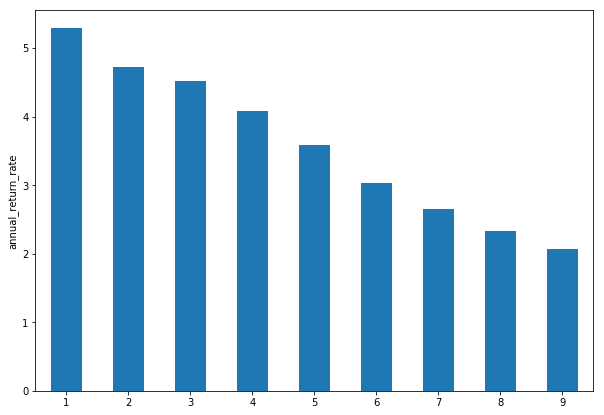

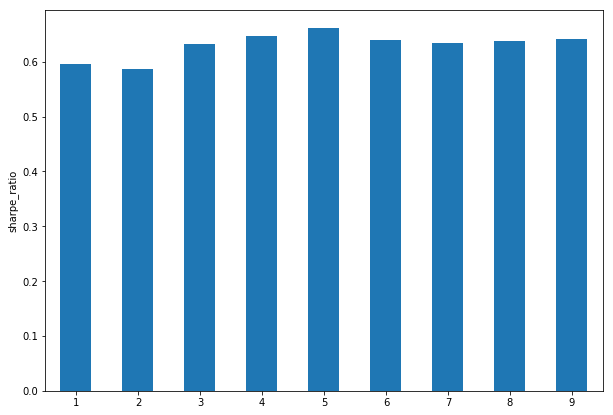

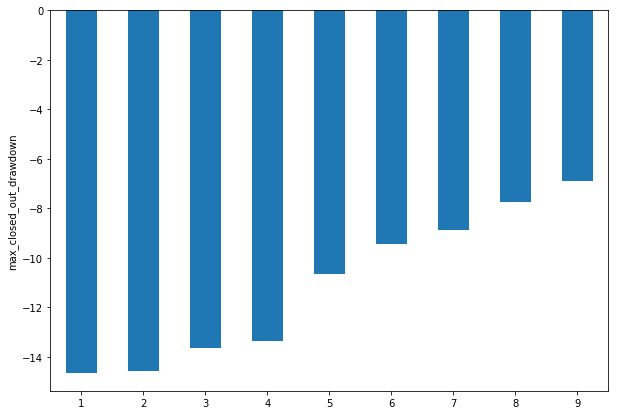

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[pos[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2000-01-03 00:00:00 BUY  68 SPY @ 145.44
2019-11-11 00:00:00 SELL -68 SPY @ 308.35


Equity curve

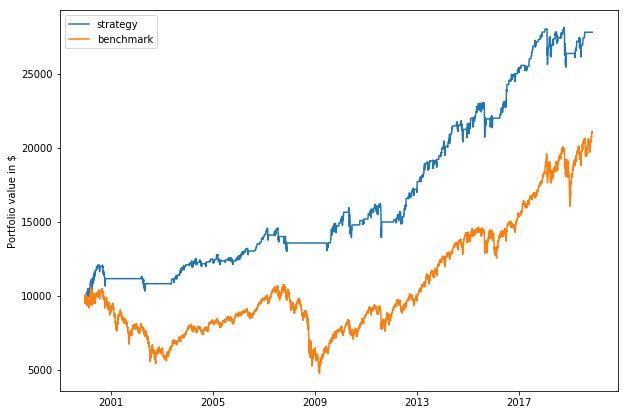

In [10]:
pf.plot_equity_curve(strategies['1'].dbal, benchmark=benchmark.dbal)